In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


In [ ]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.dpi'] = 100 # Improve plot resolution

In [56]:
fear_greed_df = pd.read_csv("fear_greed_index.csv")
historical_df = pd.read_csv("historical_data.csv")

In [57]:
print("\nFear and Greed Index Data:")
print(fear_greed_df.head())


Fear and Greed Index Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [58]:
print("\nHistorical Trading Data:")
print(historical_df.head())


Historical Trading Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID 

In [61]:
fear_greed_df.shape

(2644, 4)

In [62]:
historical_df.shape

(211224, 16)

In [38]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

In [39]:
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [40]:
historical_df['date'] = historical_df['Timestamp IST'].dt.date

In [41]:
historical_df['date'] = pd.to_datetime(historical_df['date'])

In [42]:
df_merged = pd.merge(historical_df, fear_greed_df, on='date', how='left')
df_merged.dropna(subset=['classification'], inplace=True)

In [43]:
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
sentiment_palette = {"Extreme Fear": "#d62728", "Fear": "#ff7f0e", "Neutral": "#7f7f7f",
                     "Greed": "#2ca02c", "Extreme Greed": "#1f77b4"}


In [44]:
pnl_by_sentiment = df_merged.groupby('classification')['Closed PnL'].sum().reindex(sentiment_order)

/tmp/ipython-input-500786195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette=sentiment_palette)


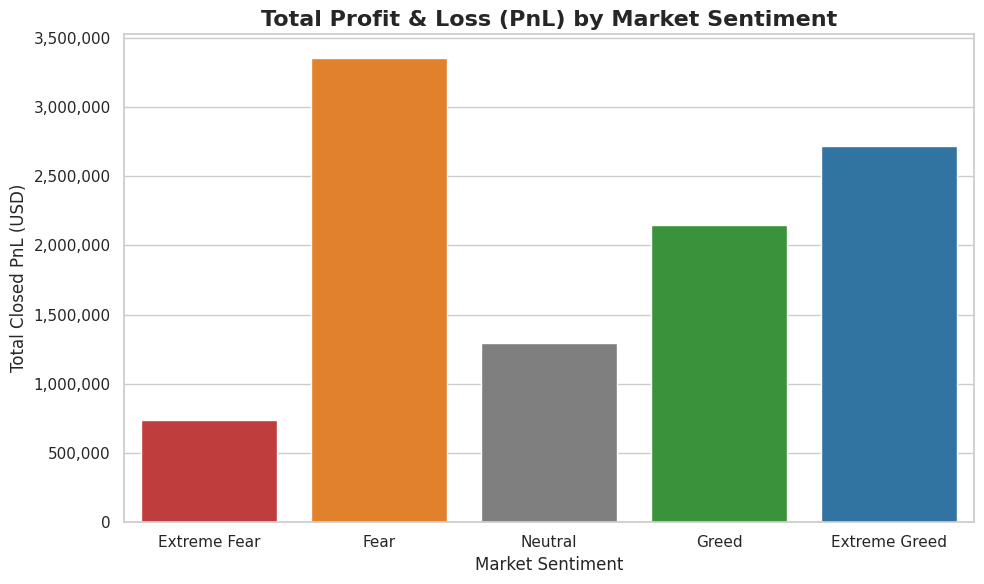

In [45]:
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette=sentiment_palette)
ax1.set_title('Total Profit & Loss (PnL) by Market Sentiment', fontsize=16, weight='bold')
ax1.set_xlabel('Market Sentiment', fontsize=12)
ax1.set_ylabel('Total Closed PnL (USD)', fontsize=12)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
volume_by_sentiment = df_merged.groupby('classification')['Size USD'].sum().reindex(sentiment_order)

/tmp/ipython-input-3019360825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette=sentiment_palette)


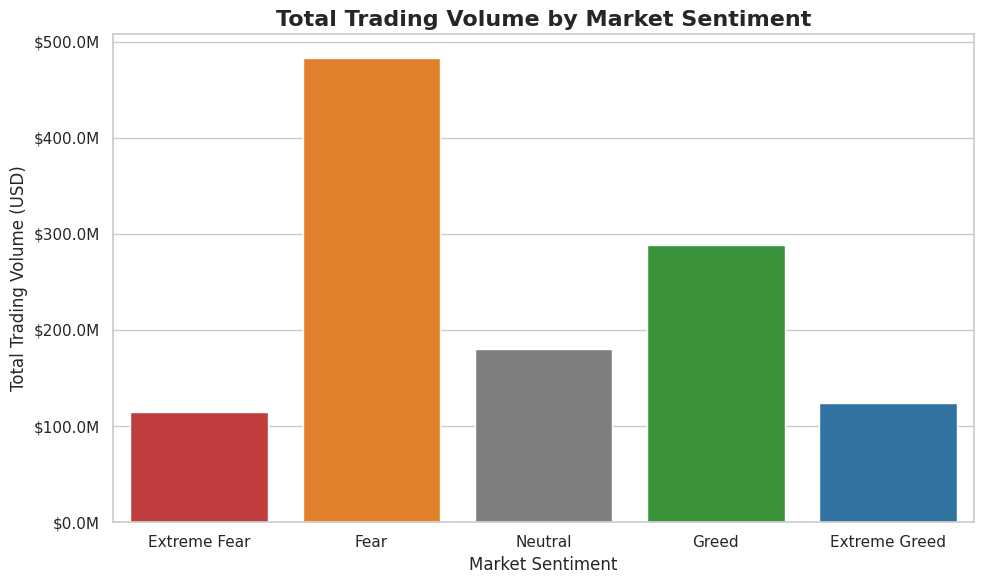

In [47]:
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette=sentiment_palette)
ax2.set_title('Total Trading Volume by Market Sentiment', fontsize=16, weight='bold')
ax2.set_xlabel('Market Sentiment', fontsize=12)
ax2.set_ylabel('Total Trading Volume (USD)', fontsize=12)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [48]:
trader_pnl = df_merged.groupby('Account')['Closed PnL'].sum()

def classify_trader(pnl):
    return 'Profitable' if pnl > 0 else 'Unprofitable'

trader_classification = trader_pnl.apply(classify_trader)
df_merged['Trader Type'] = df_merged['Account'].map(trader_classification)


In [49]:
behavior_comparison = df_merged.groupby(['Trader Type', 'classification'])['Closed PnL'].sum().reset_index()


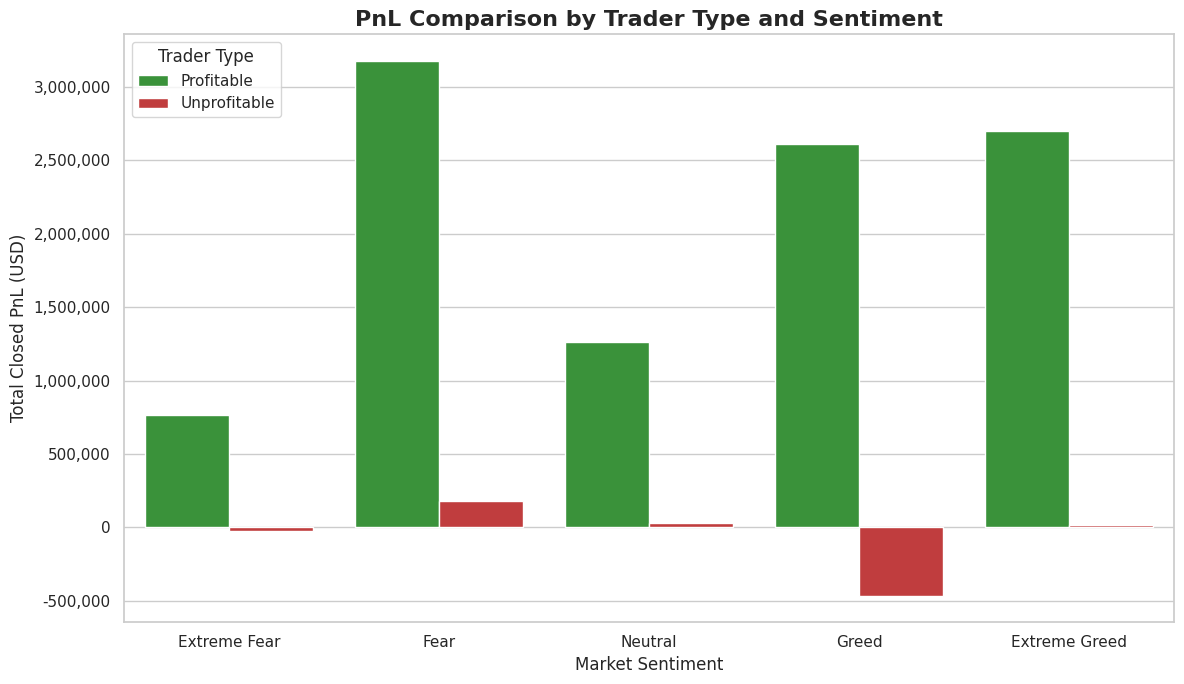

In [50]:
plt.figure(figsize=(12, 7))
ax3 = sns.barplot(data=behavior_comparison, x='classification', y='Closed PnL', hue='Trader Type',
                  order=sentiment_order, palette={'Profitable':'#2ca02c', 'Unprofitable':'#d62728'})
ax3.set_title('PnL Comparison by Trader Type and Sentiment', fontsize=16, weight='bold')
ax3.set_xlabel('Market Sentiment', fontsize=12)
ax3.set_ylabel('Total Closed PnL (USD)', fontsize=12)
ax3.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.legend(title='Trader Type', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [51]:
buy_sell_counts = df_merged.groupby(['Trader Type', 'classification', 'Side']).size().reset_index(name='Trade Count')

In [52]:
buy_sell_counts = buy_sell_counts[buy_sell_counts['Side'].isin(['BUY', 'SELL'])]

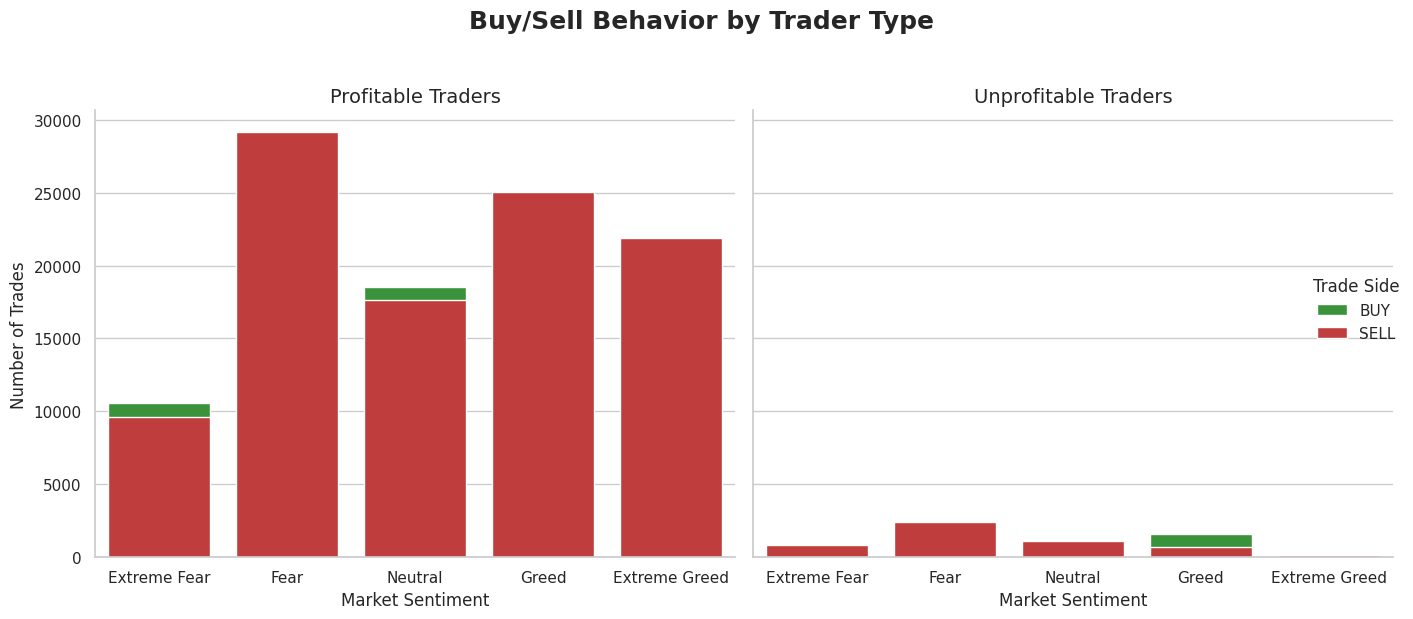

In [53]:
g = sns.FacetGrid(buy_sell_counts, col="Trader Type", hue="Side",
                  palette={'BUY':'#2ca02c', 'SELL':'#d62728'}, height=6, aspect=1.1)
g.map(sns.barplot, 'classification', 'Trade Count', order=sentiment_order)
g.set_axis_labels("Market Sentiment", "Number of Trades")
g.set_titles(col_template="{col_name} Traders", size=14)
g.add_legend(title='Trade Side')
g.fig.suptitle('Buy/Sell Behavior by Trader Type', fontsize=18, weight='bold', y=1.03)
plt.tight_layout()
plt.show()


In [54]:
print("Analysis Complete. Final check on available data columns:")
print(df_merged.columns.tolist())

Analysis Complete. Final check on available data columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'timestamp', 'value', 'classification', 'Trader Type']
